# Pierre, papier, ciseaux, lézard, Spock : seconde partie

## Importation des données

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16, preprocess_input

## Chargement des données

In [2]:
dataset = pd.read_csv('rps.csv')
dataset

,label,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3596,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3597,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3598,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = dataset.drop("label", axis = 1)
X

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3596,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3598,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = dataset['label'] -1
y

0       0
1       0
2       0
3       0
4       0
       ..
3595    2
3596    2
3597    2
3598    2
3599    2
Name: label, Length: 3600, dtype: int64

## Train, test, val split

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42, stratify = y_train_val)

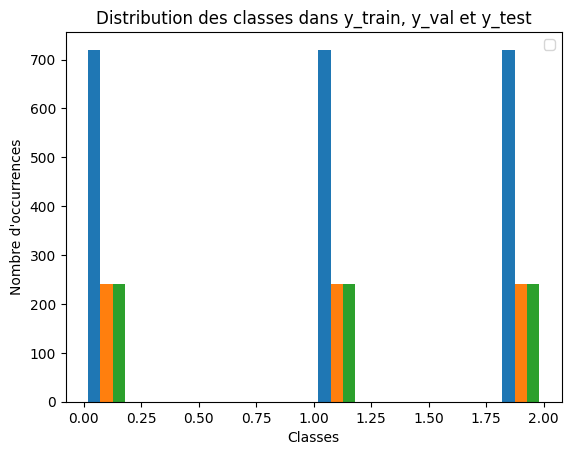

In [7]:
plt.hist([y_train, y_val, y_test])

# Ajoute des étiquettes et une légende
plt.xlabel('Classes')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des classes dans y_train, y_val et y_test')
plt.legend()

# Affiche l'histogramme
plt.show()

In [8]:
X_train.shape

(2160, 2500)

In [9]:
X_train_reshaped = np.repeat(X_train.values.reshape(-1, 50, 50, 1), 3, axis=-1)
X_val_reshaped = np.repeat(X_val.values.reshape(-1, 50, 50, 1), 3, axis=-1)
X_test_reshaped = np.repeat(X_test.values.reshape(-1, 50, 50, 1), 3, axis=-1)

In [10]:
X_train_reshaped.shape

(2160, 50, 50, 3)

In [11]:
y_train_one = tf.keras.utils.to_categorical(y_train, 3)
y_val_one = tf.keras.utils.to_categorical(y_val, 3)
y_test_one = tf.keras.utils.to_categorical(y_test, 3)

# Entrainement du modèle

## VGG16

In [12]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


## Datagen

In [13]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5,1.5),
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

## Entrainement du modèle

In [14]:
X_val_pp = preprocess_input(X_val_reshaped)
X_test_pp = preprocess_input(X_test_reshaped)

In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    vgg16_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 14846787 (56.64 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [21]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
    ]
)

In [22]:
history = model.fit(datagen.flow(X_train_reshaped, y_train_one, batch_size=2160), epochs=10, validation_data=(X_val_pp, y_val_one), verbose=1)

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 10.1520 - accuracy: 0.5014 - precision: 0.2494 - recall: 0.2468 - val_loss: 14.4475 - val_accuracy: 0.4583 - val_precision: 0.1875 - val_recall: 0.1875
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 5.7872 - accuracy: 0.5750 - precision: 0.3603 - recall: 0.3546 - val_loss: 6.5592 - val_accuracy: 0.5028 - val_precision: 0.2542 - val_recall: 0.2542
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 3.7402 - accuracy: 0.6480 - precision: 0.4717 - recall: 0.4667 - val_loss: 1.8757 - val_accuracy: 0.7551 - val_precision: 0.6328 - val_recall: 0.6319
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 2.2793 - accuracy: 0.7394 - precision: 0.6102 - recall: 0.6037 - val_loss: 0.2601 - val_accuracy: 0.9227 - val_precision: 0.8867 - val_recall: 0.8806
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 1.1459 - accuracy: 0.8315 - precision: 0.7488 - rec

In [ ]:
# Performances du modèle

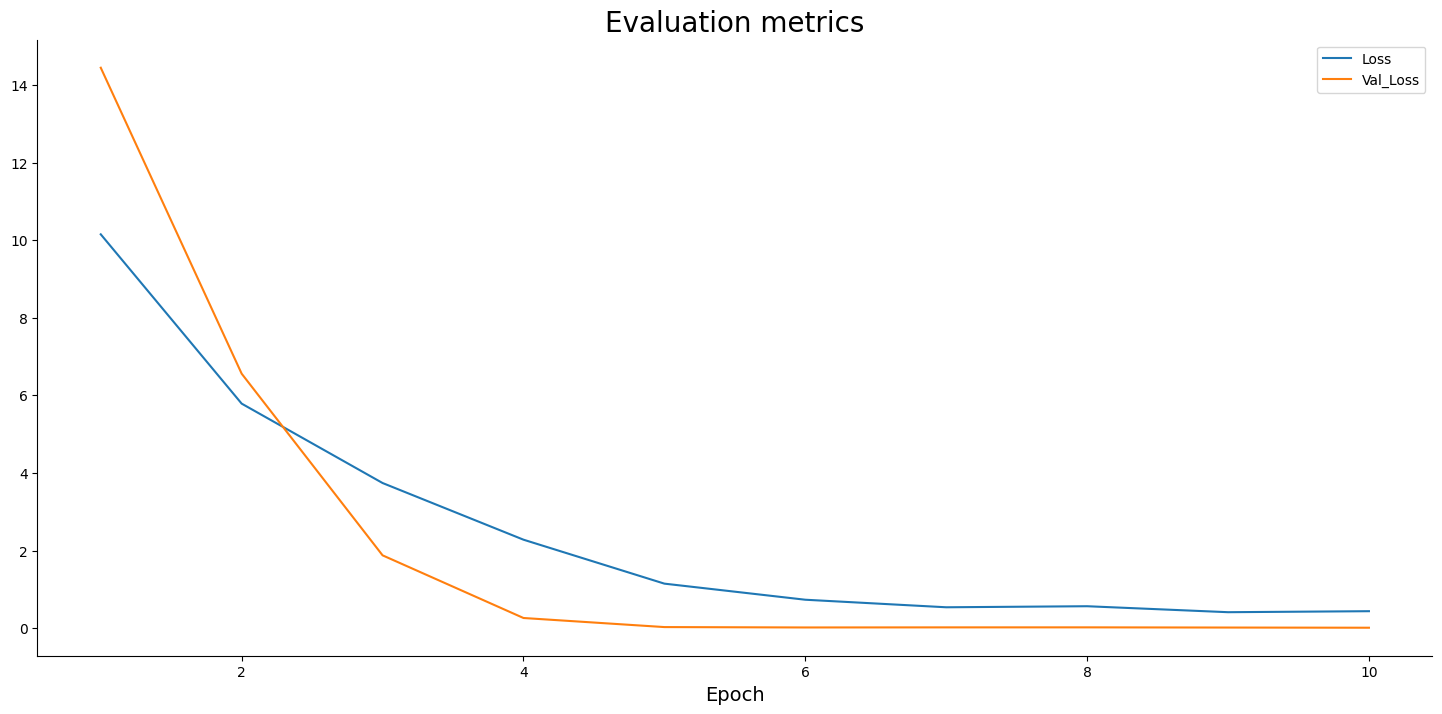

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 11), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 11), history.history['val_loss'], label='Val_Loss')

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

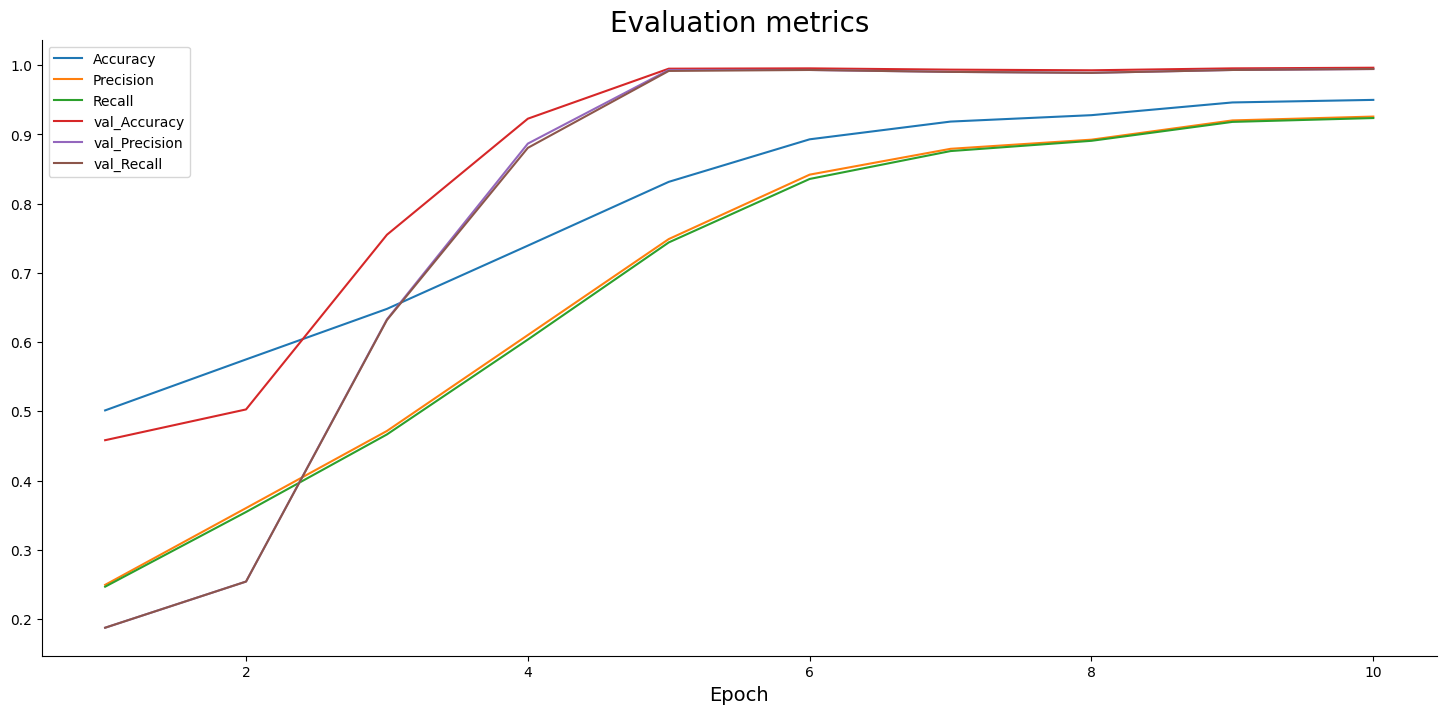

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 11), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 11), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 11), history.history['recall'], label='Recall')
plt.plot(np.arange(1, 11), history.history['val_accuracy'], label='val_Accuracy')
plt.plot(np.arange(1, 11), history.history['val_precision'], label='val_Precision')
plt.plot(np.arange(1, 11), history.history['val_recall'], label='val_Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
# Evaluation du modèle

In [25]:
X_train_pp = preprocess_input(X_train_reshaped) # Preprocess
y_pred_train = model.predict(X_train_pp)
y_pred_val = model.predict(X_val_pp)
y_pred_test = model.predict(X_test_pp)

23/23 [==============================] - 0s 11ms/step


In [26]:
# Conversion des probabilités pour l'ensemble d'entraînement
y_pred_train_classes = [np.argmax(one_hot_vector) for one_hot_vector in y_pred_train]
print(y_pred_train_classes[:20])

# Conversion des probabilités pour l'ensemble de validation
y_pred_val_classes = [np.argmax(one_hot_vector) for one_hot_vector in y_pred_val]
print(y_pred_val_classes[:20])

# Conversion des probabilités pour l'ensemble de test
y_pred_test_classes = [np.argmax(one_hot_vector) for one_hot_vector in y_pred_test]
print(y_pred_test_classes[:20])


[0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2]
[2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2]
[2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2]


In [ ]:
## Evaluation du modèle sur le jeu d'apprentissage

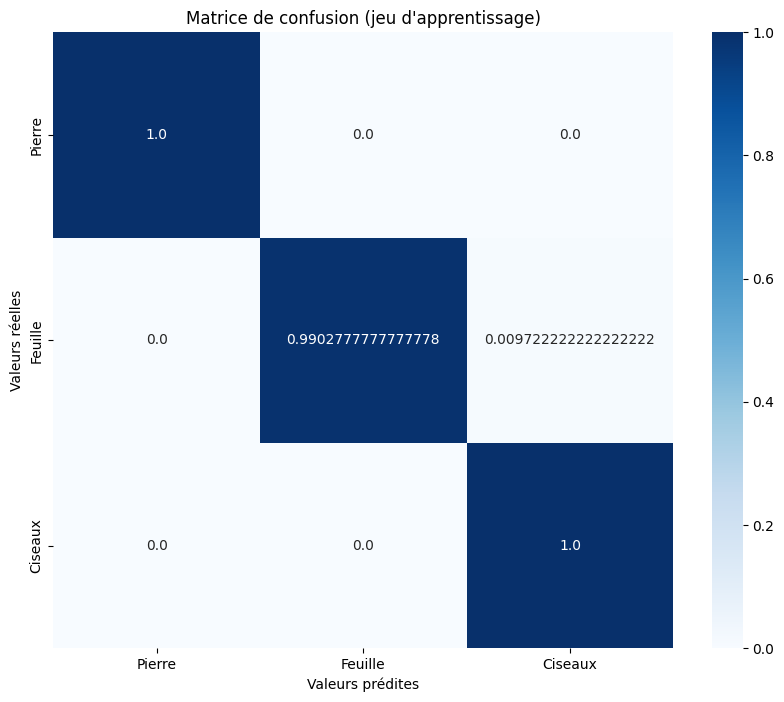

In [27]:
# Matrice de confusion pour le jeu d'apprentissage
cm = confusion_matrix(y_train, y_pred_train_classes, normalize='true')

# Noms des classes (à ajuster selon vos classes)
class_names = ['Pierre', 'Feuille', 'Ciseaux']

# Comptages bruts dans la matrice de confusion
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_train, y_pred_train_classes, normalize=None).flatten()]

# Pourcentages normalisés dans la matrice de confusion
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred_train_classes, normalize='true').flatten()]

# Labels des cases avec noms, comptages bruts et pourcentages
box_labels = [[f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(class_names, counts, percentages)]]

# Création de la figure
plt.figure(figsize=(10, 8), dpi=100)

# Titre
plt.title("Matrice de confusion (jeu d'apprentissage)")

# Création de la heatmap
sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)

# Labels des axes
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Affichage de la figure
plt.show()


In [28]:
# Accuracy, Precision et Recall du train
print(f'Accuracy train:  {accuracy_score(y_train, y_pred_train_classes):.2f}')
print(f'Precision train: {precision_score(y_train, y_pred_train_classes, average=None)}')
print(f'Recall train:    {recall_score(y_train, y_pred_train_classes, average=None)}')


Accuracy train:  1.00
Precision train: [1.         1.         0.99037139]
Recall train:    [1.         0.99027778 1.        ]


In [29]:
print(classification_report(y_train, y_pred_train_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      0.99      1.00       720
           2       0.99      1.00      1.00       720

    accuracy                           1.00      2160
   macro avg       1.00      1.00      1.00      2160
weighted avg       1.00      1.00      1.00      2160



In [ ]:
## Evaluation sur le jeu de validation

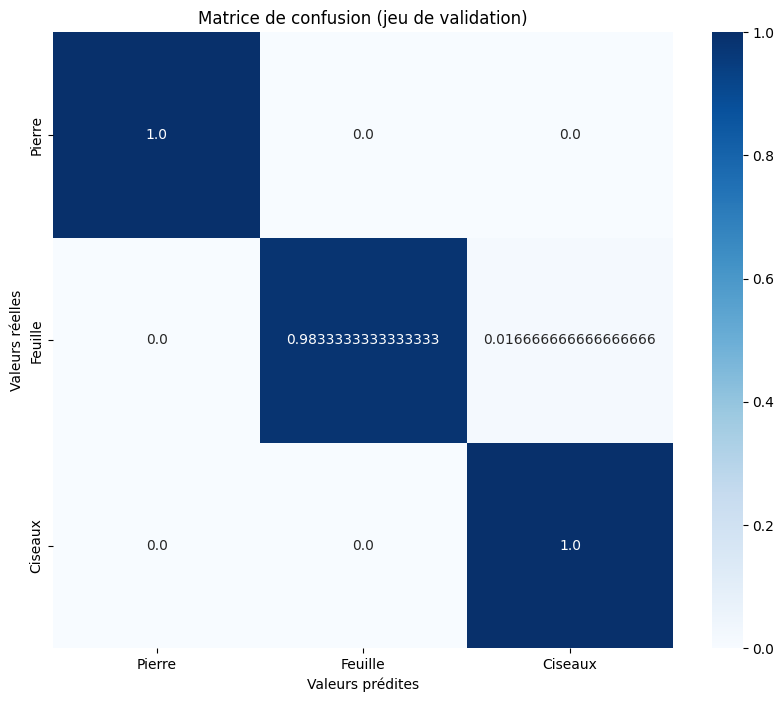

In [30]:
# Matrice de confusion du jeu de validation
cm = confusion_matrix(y_val, y_pred_val_classes, normalize='true')

# Noms des classes (à ajuster selon vos classes)
class_names = ['Pierre', 'Feuille', 'Ciseaux']

# Comptages bruts dans la matrice de confusion
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_val, y_pred_val_classes, normalize=None).flatten()]

# Pourcentages normalisés dans la matrice de confusion
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_val, y_pred_val_classes, normalize='true').flatten()]

# Labels des cases avec noms, comptages bruts et pourcentages
box_labels = [[f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(class_names, counts, percentages)]]

# Création de la figure
plt.figure(figsize=(10, 8), dpi=100)

# Titre
plt.title("Matrice de confusion (jeu de validation)")

# Création de la heatmap
sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)

# Labels des axes
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Affichage de la figure
plt.show()


In [31]:
# Accuracy, Precision et Recall du test
print(f'Accuracy val:  {accuracy_score(y_val, y_pred_val_classes):.2f}')
print(f'Precision train: {precision_score(y_val, y_pred_val_classes, average=None)}')
print(f'Recall train:    {recall_score(y_val, y_pred_val_classes, average=None)}')

Accuracy val:  0.99
Precision train: [1.         1.         0.98360656]
Recall train:    [1.         0.98333333 1.        ]


In [32]:
print(classification_report(y_val, y_pred_val_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      0.98      0.99       240
           2       0.98      1.00      0.99       240

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [ ]:
## Evaluation sur le jeu de test

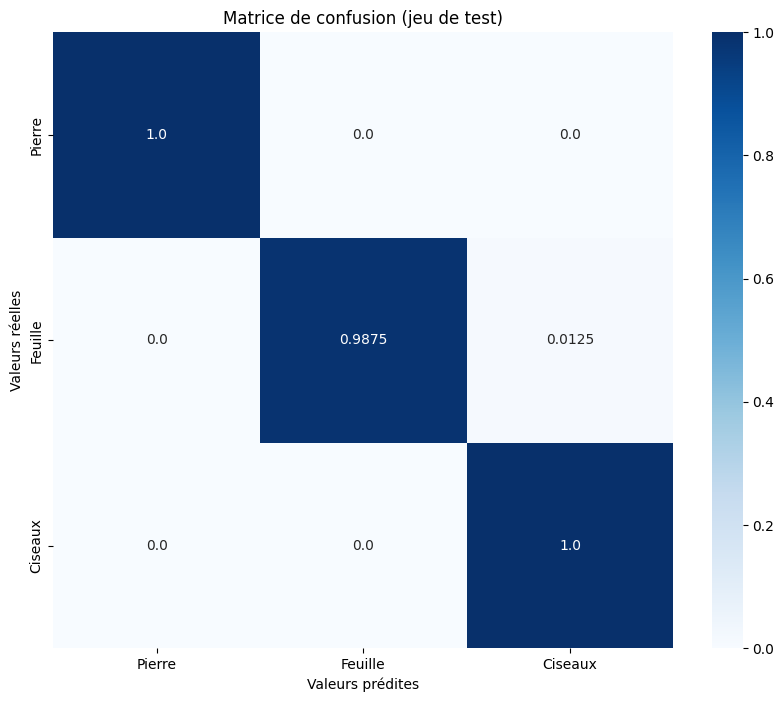

In [33]:
# Matrice de confusion du jeu de validation
cm = confusion_matrix(y_test, y_pred_test_classes, normalize='true')

# Noms des classes (à ajuster selon vos classes)
class_names = ['Pierre', 'Feuille', 'Ciseaux']

# Comptages bruts dans la matrice de confusion
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_pred_test_classes, normalize=None).flatten()]

# Pourcentages normalisés dans la matrice de confusion
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_pred_test_classes, normalize='true').flatten()]

# Labels des cases avec noms, comptages bruts et pourcentages
box_labels = [[f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(class_names, counts, percentages)]]

# Création de la figure
plt.figure(figsize=(10, 8), dpi=100)

# Titre
plt.title("Matrice de confusion (jeu de test)")

# Création de la heatmap
sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)

# Labels des axes
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Affichage de la figure
plt.show()


In [34]:
# Accuracy, Precision et Recall du test
print(f'Accuracy val:  {accuracy_score(y_test, y_pred_test_classes):.2f}')
print(f'Precision train: {precision_score(y_test, y_pred_test_classes, average=None)}')
print(f'Recall train:    {recall_score(y_test, y_pred_test_classes, average=None)}')

Accuracy val:  1.00
Precision train: [1.         1.         0.98765432]
Recall train:    [1.     0.9875 1.    ]


In [35]:
print(classification_report(y_test, y_pred_test_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      0.99      0.99       240
           2       0.99      1.00      0.99       240

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [36]:
model.save('RPS.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
